In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
from sklearn.manifold import TSNE
from adjustText import adjust_text

In [2]:
from nl2pandas.backend.nli_for_pandas.data.data import Data
from nl2pandas.backend.nli_for_pandas.embedding.BERT import BERT

In [3]:
data = Data(file="evaluation/embedding_action_set.csv")
bert = BERT()

In [4]:
embeddings = bert.embed(data.utterances)
embeddings

array([[-0.53729033,  1.2221992 , -0.3611952 , ..., -0.25604647,
         0.719459  , -1.2142504 ],
       [ 0.09245385,  0.9527888 , -0.8333836 , ..., -0.05356065,
         0.60643274,  0.25609496],
       [-0.16987072,  1.6165601 , -0.9994729 , ..., -0.5012912 ,
         0.4695517 , -0.68593436],
       ...,
       [ 0.2260714 ,  0.54131454,  0.48710918, ...,  0.98433465,
        -0.60497797,  0.7798161 ],
       [ 0.50317675, -0.22649384, -0.65664625, ..., -0.08295374,
        -0.14776918,  0.79914945],
       [ 0.76004606,  0.57704157,  0.13788624, ...,  0.60642254,
         0.05222914,  1.0545136 ]], dtype=float32)

In [5]:
def tsneplot(embeddings, utterances, perplexity=10):
    """
    Plot the results from the t-SNE dimensionality reduction 
    """
    
    np.set_printoptions(suppress=True)
    plt.rcParams.update({'font.size': 22})
    Y = TSNE(n_components=2, random_state=0, perplexity=perplexity).fit_transform(embeddings)
    
    # Sets everything up to plot
    x = [x for x in Y[:, 0]]
    y = [y for y in Y[:, 1]]
    
    fig, ax = plt.subplots()
    fig.set_size_inches(27, 20)
    
    # Basic plot
    plt.scatter(x, y)
    
    # annotate
    labels = []
    for i in range(len(utterances)):
        labels.append(plt.text(x[i], y[i], utterances[i]))
    adjust_text(labels, x=x, y=y, force_points=0.5)
    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
    
    plt.title("TSNE with Perplexity: " + str(perplexity))
    
    plt.savefig("utteranceEmbeddings7.png")

C:\Users\User\AppData\Local\pypoetry\Cache\virtualenvs\pandas-nli-9Y4WQ66g-py3.9\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\User\AppData\Local\pypoetry\Cache\virtualenvs\pandas-nli-9Y4WQ66g-py3.9\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


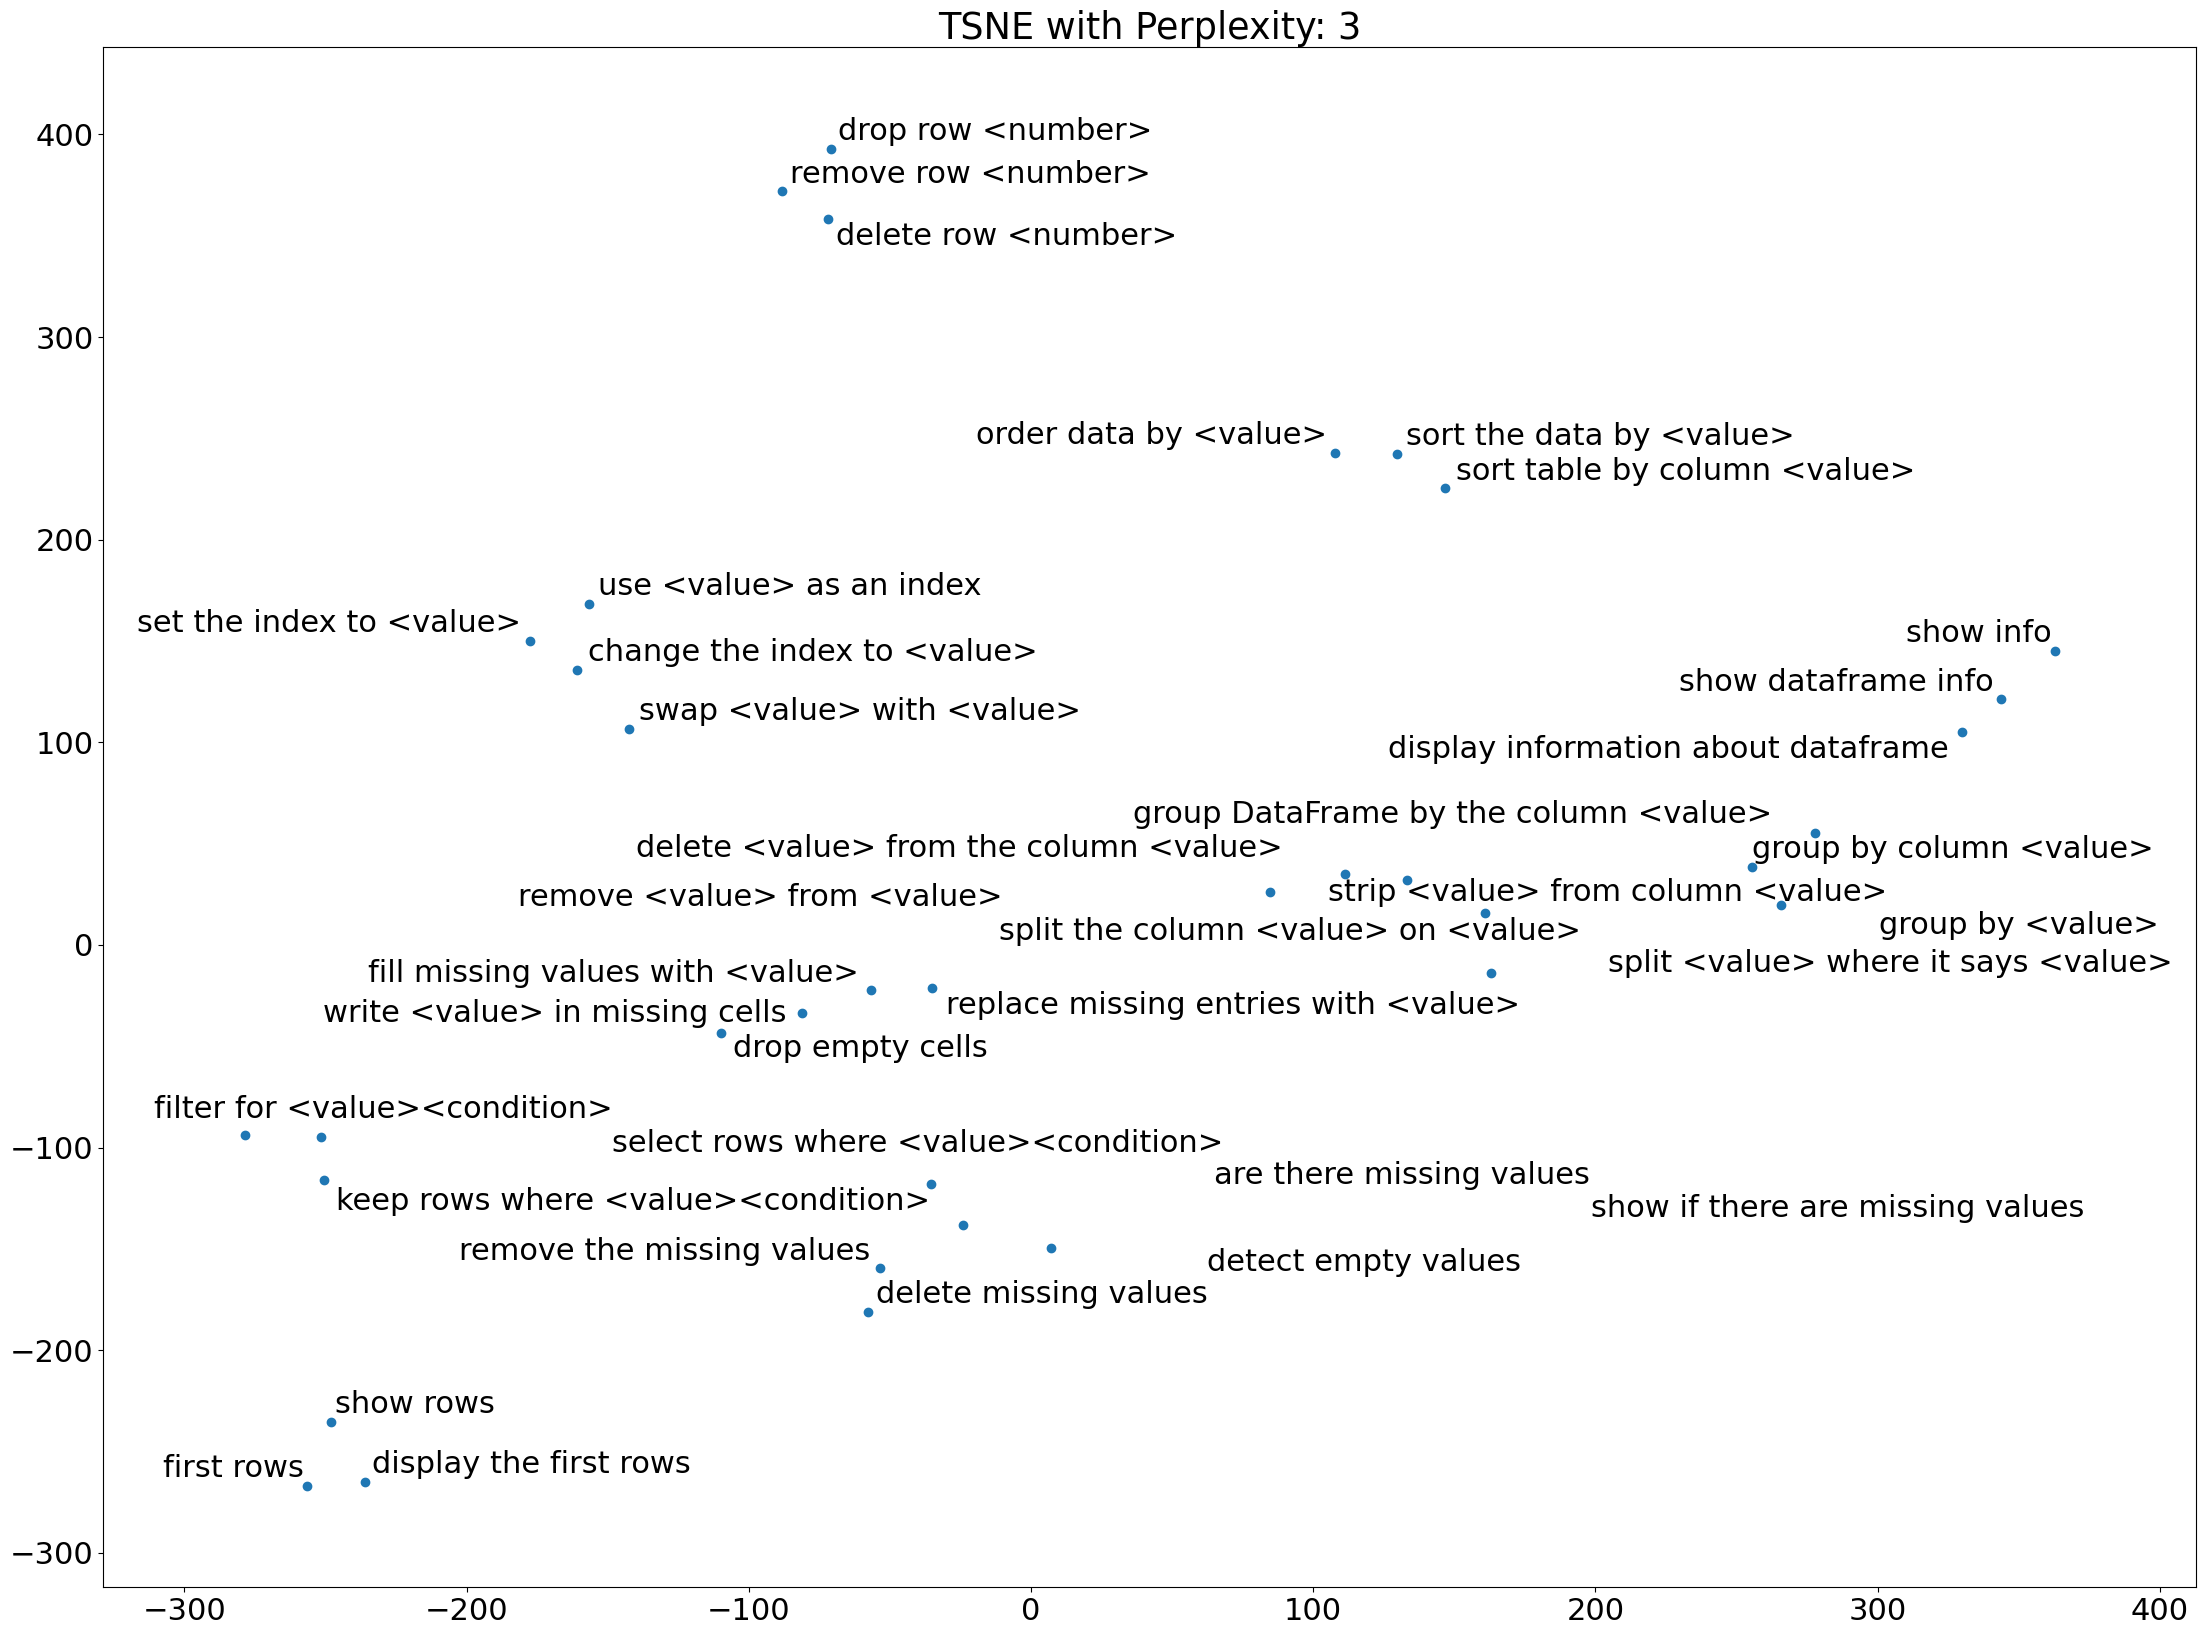

In [6]:
for perplexity in [3]:
    tsneplot(embeddings, data.utterances, perplexity)